# One-Sample Tests

## I. One-Sample Z-Test 

**The conditions for one-sample z-test include:** 
- Samples are randomly selected
- Each event/observation is independent of the other
- Sampling distribution approximates normal distribution (or, the data follows a normal distribution)
- Comparision of a sample mean with the population mean
- Population variance is known 
- Sample size is large (i.e., n $\geq$ 30)

The formula for the one-sample z-test is:

$$
Z\ (cal.) = \frac{(\bar{x} - \mu_0)}{\frac{\sigma}{\sqrt{n}}}
$$

Where:

$\bar{x}$ = Sample mean  
$\mu_0$ = Population mean (hypothesized)  
$\sigma$ = Population standard deviation  
$n$ = Sample size

### *One-Sample Z-Test (Two-Tailed Test)*

**Question:** A company produces perfume bottles with an average volume of 150 cc and a standard deviation of 2 cc. A sample of 100 bottles was randomly selected and measured, and the average volume was found to be 150.2 cc. Has the average volume changed from 150 cc? Perform a hypothesis test at the 95% confidence level.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats # Since the scipy.stats library doesn't include a z-test function, we need to import weightstats — which contains the z-test — from statsmodels.stats library.  

**Loading Data**

In [2]:
# Reading data as df
df = pd.read_csv('Machine1.csv')

In [3]:
# Checking the head of dataFrame
df.head()

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58


In [4]:
# Checking describe() method to see statistical summary of the numerical column of the dataset
df.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


**Since our sample size is large (n = 100), we treat the sample standard deviation of 2 as an estimate of the population standard deviation.**

In [5]:
# Checking info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Machine 1  100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


**Visualizing Data**

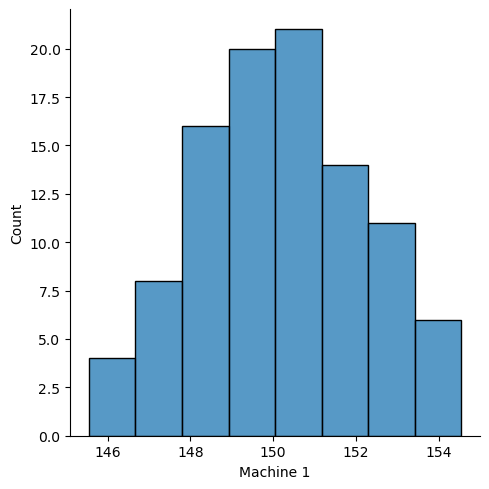

In [6]:
# Plotting histogram
sns.displot(data=df, x='Machine 1'); # By default, kind='hist' in the displot

**Stating Hypothesis**

Null hypothesis H0: $\mu$ = $\mu_0$ or $\mu$ = 150cc (The mean volume of bottles is 150cc — indicating no change in population mean)

Alternative hypothesis H1: $\mu$ $\neq$ $\mu_0$ or $\mu$ $\neq$ 150cc (The mean volume of bottles is different from 150cc — suggesting a change in population mean)

Here, $\mu$ refers to the true but unknown population mean we are testing.

**Selecting the Level of Significance or α Level or the Probability of Error**

Given that the confidence level (1 - α) is 95%, the significance level (α) is 5% (or 0.05). Therefore, for a two-tailed test, the significance level for each tail is α/2 = 0.025.

**Calculating Test Statistic and P-Value**

In [7]:
weightstats.ztest(x1=df['Machine 1'], value=150, alternative='two-sided') 
# Here, the value of 150 is the hypothesized mean or the population mean against which we compare the sample mean
# Alternative='two-sided' is the default test type here

(1.0060370247722599, 0.3143977600779597)

Here, calculated test statistic (Z calculated or Z cal) is 1.00 and the two-tailed p-value associated with Z cal = 1 is 0.314.

**Interpreting Results**

Since the p-value is greater than α (0.05), we fail to reject the null hypothesis. Therefore, we conclude that there is no statistical evidence to show that the mean volume of the bottles has changed.

### *One-Sample Z-Test (Right-Tailed Test)*

**Question:** A company produces perfume bottles with an average volume of 150 cc and a standard deviation of 2 cc. A sample of 100 bottles was randomly selected and measured, and the average volume was found to be 150.2 cc. Has the average volume increased from 150cc? Perform a hypothesis test at the 95% confidence level.

**Stating Hypothesis**

Null hypothesis H0: $\mu$ $\leq$ $\mu_0$ or $\mu$ $\leq$ 150cc (The mean volume of bottles is less than or equal to 150cc — indicating no increase in population mean)

Alternative hypothesis H1: $\mu$ $\gt$ $\mu_0$ or $\mu$ $\gt$ 150cc (The mean volume of bottles is greater than 150cc — suggesting an increase in the population mean)

Here, $\mu$ refers to the true but unknown population mean we are testing.

**Selecting the Level of Significance or α Level or the Probability of Error**

Given that the confidence level (1 - α) is 95%, the level of significance (α) for the one-tailed test is 5% or 0.05. 

**Calculating Test Statistic and P-Value**

In [8]:
weightstats.ztest(x1=df['Machine 1'], value=150, alternative='larger') 
# Here, the value of 150 is the hypothesized mean or the population mean against which we compare the sample mean

(1.0060370247722599, 0.15719888003897986)

Here, calculated test statistic (Z calculated or Z cal) is 1.00 and the right-tailed p-value associated with Z cal = 1 is 0.157.

**Interpreting Results**

Since the p-value is greater than α = 0.05, we fail to reject the null hypothesis. Therefore, we conclude that there is insufficient statistical evidence to support an increase in the mean volume of the bottles from 150 cc.

### A t-test is also an alternative to a z-test when the sample size is large
A t-distribution approaches the z-distribution (or a standard normal distribution) when the sample size increases.

**Let’s check this by performing a t-test using the scipy.stats module.**  

In [9]:
# For Two-Tailed Test
stats.ttest_1samp(a=df['Machine 1'], popmean=150, alternative='two-sided')

TtestResult(statistic=1.0060370247722599, pvalue=0.3168503751206756, df=99)

Here, the t-test yields similar results to the two-sided z-test conducted above.

In [10]:
# For Right-Tailed Test
stats.ttest_1samp(a=df['Machine 1'], popmean=150, alternative='greater')

TtestResult(statistic=1.0060370247722599, pvalue=0.1584251875603378, df=99)

Here, the t-test yields similar results to the right-tailed z-test conducted above.

## II. One-Sample T-Test 

**The conditions for one-sample t-test include:**
- Samples are randomly selected
- Each event/observation is independent of the other
- Sampling distribution approximates normal distribution (or, the data follows a normal distribution)
- Comparision of a sample mean with the population mean
- Population variance is unknown 
- Sample size is small (i.e., n $\lt$ 30)

The formula for the one-sample t-test is:

$$ t\ (cal.) = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}} $$

Where:

$\bar{x}$ = Sample mean

$\mu_0$ = Population mean (hypothesized) 

$s$ = Sample standard deviation

$n$ = Sample size

### *One-Sample T-Test (Two-Tailed Test)*

**Question:** A company produces perfume bottles with an average volume of 150 cc. We randomly selected 4 bottles and found their average volume to be 151 cc, with a standard deviation of 2 cc. Has the mean volume of the bottles changed? Perform a hypothesis test at the 95% confidence level.

**Importing Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Creating Data**

In [12]:
# Creating a pandas Series (i.e., data) with the represention of the volume of four bottles and assigning it to a variable named 'volume'
volume = pd.Series([148.5, 153.4, 150.9, 151.2])
volume

0    148.5
1    153.4
2    150.9
3    151.2
dtype: float64

In [13]:
# Checking describe() method to see statistical summary of the dataset
volume.describe()

count      4.000000
mean     151.000000
std        2.004994
min      148.500000
25%      150.300000
50%      151.050000
75%      151.750000
max      153.400000
dtype: float64

**Visualizing Data**

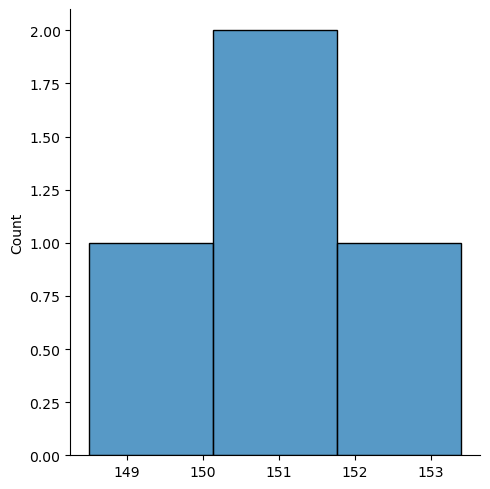

In [14]:
# Plotting histogram
sns.displot(data=volume); # By default, kind='hist' in the displot

**Stating Hypothesis**

Null hypothesis H0: $\mu$ = $\mu_0$ or $\mu$ = 150cc (The mean volume of bottles is 150cc — indicating no change in population mean)

Alternative hypothesis H1: $\mu$ $\neq$ $\mu_0$ or $\mu$ $\neq$ 150cc (The mean volume of bottles is different from 150cc — suggesting a change in population mean)

Here, $\mu$ refers to the true but unknown population mean we are testing.

**Selecting the Level of Significance or α Level or the Probability of Error**

Given that the confidence level (1 - α) is 95%, the significance level (α) is 5% (or 0.05). Therefore, for a two-tailed test, the significance level for each tail is α/2 = 0.025.

**Calculating Test Statistic and P-Value**

In [15]:
stats.ttest_1samp(a=volume, popmean=150, alternative='two-sided')
# Here, alternative='two-sided' is the default test type 

TtestResult(statistic=0.997509336107632, pvalue=0.3920333832606524, df=3)

**Interpreting Results**

Since the p-value is greater than α = 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the mean volume of the bottles has not significantly changed from 150 cc.

### *One-Sample T-Test (Right-Tailed Test)*

**Question:** A company produces perfume bottles with an average volume of 150 cc. We randomly selected 4 bottles and found their average volume to be 151 cc, with a standard deviation of 2 cc. Has the mean volume of the bottles increased? Perform a hypothesis test at the 95% confidence level.

**Stating Hypothesis**

Null hypothesis H0: $\mu$ $\leq$ $\mu_0$ or $\mu$ $\leq$ 150cc (The mean volume of bottles is less than or equal to 150cc — indicating no increase in population mean)

Alternative hypothesis H1: $\mu$ $\gt$ $\mu_0$ or $\mu$ $\gt$ 150cc (The mean volume of bottles is greater than 150cc — suggesting an increase in the population mean)

Here, $\mu$ refers to the true but unknown population mean we are testing.

**Selecting the Level of Significance or α Level or the Probability of Error**

Given that the confidence level (1 - α) is 95%, the level of significance (α) for the one-tailed test is 5% or 0.05. 

**Calculating Test Statistic and P-Value**

In [16]:
stats.ttest_1samp(a=volume, popmean=150, alternative='greater')

TtestResult(statistic=0.997509336107632, pvalue=0.1960166916303262, df=3)

**Interpreting Results**

Since the p-value is greater than α = 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the mean volume of the bottles has not significantly increassed from 150 cc.

## III. One-Sample Proportion Test

**The conditions for one-sample proportion test include:** 
- Samples are randomly selected
- Each event/observation is independent of the other
- The data has only 2 categories (or 2 possible outcomes), such as yes/no or pass/fail
- Comparision of a sample proportion with the population proportion 

### 'One Proportion Z-Test' For One-Sample Proportion Test

**To approximate a binomial distribution with a normal distribution,** a condition for a one-sample proportion test is that the data should include at least 10 successes (i.e., $n\ p_0$ $\geq$ 10) and 10 failures (i.e., n (1 - $\ p_0$) $\geq$ 10). **Some sources, however, suggest a minimum of 5 successes and 5 failures instead.**

Here, the formula for the one-proportion z-statistic is:

$$ Z\ (cal.) = \frac{\hat p - p_0}{\sqrt{\frac{p_0 (1 - p_0)}{n}}}\ or \ {\frac{\hat p - p_0}{SE}}$$

Where:

$\hat p$ = Sample proportion

$p_0$ = Population proportion (hypothesized)

$n$ = Sample size

$SE$ = Standard error

### *One-Sample Proportion Test (Two-Tailed Test)*

**Question:** The smoking rate in a city was previously 21%. When 100 individuals in the city were randomly selected and examined for smoking habits, 14 were identified as smokers. Has the smoking rate in the city changed? Perform a hypothesis test at the 95% confidence level.

**Importing Libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

**Loading Data**

In [18]:
# Reading data as smk
smk = pd.read_csv('Smokers.csv')
smk.head()

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No


In [19]:
# Checking describe() method
smk.describe()

,Name,Smokers
count,100,100
unique,100,2
top,Person 1,No
freq,1,86


In [20]:
# Grouping data into 'Yes (Smokers)' and 'No (non-smokers)' categories and applying aggregate function like count()
smk_category = smk.groupby(by='Smokers').count()
smk_category

,Name
Smokers,
No,86
Yes,14


In [21]:
# Reordering the index 
smk_yes_no = smk_category.reindex(['Yes', 'No'])
smk_yes_no

,Name
Smokers,
Yes,14
No,86


**Stating Hypothesis**

Null hypothesis H0: p = p0 or p = 0.21 (The proportion of smokers in the city is 21% - indicating no change in population proportion)

Alternative hypothesis H1: p $\neq$ p0 or p $\neq$ 0.21 (The proportion of smokers in the city is different from 21% - suggesting a change in the population proportion)

Here, $p$ refers to the true but unknown population proportion we are testing.

**Selecting the Level of Significance or α Level or the Probability of Error**

Given that the confidence level (1 - α) is 95%, the significance level (α) is 5% (or 0.05). Therefore, for a two-tailed test, the significance level for each tail is α/2 = 0.025.

**Calculating Test Statistic and P-Value**

Here, we perform **One Proportion Z-Test** using proportions_ztest() function from the Statsmodels library, which is based on a normal (z) test, as **it approximates the binomial distribution with a normal distribution**.

In [22]:
# Using 'Score Method' or 'Expected Proportion' (i.e., by using 'value = expected/hypothesized proportion')
# In the Score Method, we also set the proportion variance (or prop_var) equal to the hypothesized population proportion.
proportions_ztest(count=14, nobs=100, value=0.21, prop_var=0.21, alternative='two-sided')
# Here, count = n * p where, n is the sample size that equals to 'nobs', and p is the observed/sample proportion 

(-1.7186001564908264, 0.08568720317038374)

In [23]:
# Using 'Wald Method' or 'Observed Proportion' (i.e., by using 'value = observed/sample proportion')
proportions_ztest(count=21, nobs=100, value=.14, alternative='two-sided')
# Here, count = n * p0 where, n is the sample size that equals to 'nobs', and p0 is the hypothesized proportion

(1.7186001564908264, 0.08568720317038374)

Here, calculated test statistic (Z cal) is 1.71 and the two-tailed p-value associated with Z cal = 1.71 is 0.085.

**Interpreting Results**

Since the p-value is greater than α = 0.05, we fail to reject the null hypothesis. Therefore, we conclude that population proportion of the smokers in the city has not significantly changed from 21%.

### *One-Sample Proportion Test (Left-Tailed Test)*

**Question:** The smoking rate in a city was previously 21%. When 100 individuals in the city were randomly selected and examined for smoking habits, 14 were identified as smokers. Has the smoking rate in the city reduced? Perform a hypothesis test at the 95% confidence level.

**Stating Hypothesis**

Null hypothesis H0: p $\geq$ p0 or p $\geq$ 0.21 (The current proportion of smokers in the city is greater than or equal to 0.21, suggesting that there has been no decrease in the proportion of smokers in the population)

Alternative hypothesis H1: p $\lt$ p0 or p $\lt$ 0.21 (The current proportion of smokers in the city is less than 0.21, suggesting a decrease in the proportion of smokers in the population)

Here, $p$ refers to the true but unknown population proportion we are testing.

**Selecting the Level of Significance or α Level or the Probability of Error**

Given that the confidence level (1 - α) is 95%, the level of significance (α) for the one-tailed test is 5% or 0.05. 

**Calculating Test Statistic and P-Value**

Here, we perform **One Proportion Z-Test** using proportions_ztest() function from the Statsmodels library, which is based on a normal (z) test, as **it approximates the binomial distribution with a normal distribution**.

In [24]:
# Using 'Score Method' or 'Expected Proportion' (i.e., by using 'value = expected/hypothesized proportion')
# In the Score Method, we also set the proportion variance (or prop_var) equal to the hypothesized population proportion.
proportions_ztest(count=14, nobs=100, value=0.21, prop_var=0.21, alternative='smaller')
# Here, count = n * p where, n is the sample size that equals to 'nobs', and p is the observed/sample proportion

(-1.7186001564908264, 0.04284360158519187)

Here, the calculated test statistic (Z cal) is -1.71 and the left-tailed p-value associated with Z cal = -1.71 is 0.042.

**Interpreting Results**

Here, the p-value is less than α = 0.05, so we reject the null hypothesis. Therefore, we conclude that population proportion of the smokers in the city has significantly decreased.

## IV. One-Sample Variance Test

**The conditions for one-sample variance test include:** 
- Samples are randomly selected
- Each event/observation is independent of the other
- Comparision of a sample variance with the population variance
- Sampling distribution approximates normal distribution (or, the data follows a normal distribution)

Since there is no built-in variance test in either 'scipy.stats' or 'statsmodels.stats', we need to manually calculate the $\chi^2$ test statistic using the formula:

$$\chi^2\ (cal.) = \frac{(n-1)s^2}{\sigma_0^2}$$

Where:

$n$ = Sample size 

$s^2$ = Sample variance

$\sigma_0^2$ = Population variance (hypothesized)

df (Degrees of freedom) = n - 1

###  *'Chi-Squared Test' for One-Sample Variance Test (Two-Tailed Test)*

**Question:** When a sample of 51 bottles was selected and measured, the standard deviation was found to be 2.35 cc. The population standard deviation was 2 cc. Has the sample variance changed from the population variance? Conduct a hypothesis test at the 90% confidence level.

**Importing Libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Creating Data**

In [26]:
x_ax = np.linspace(0, 100, 101)
y_ax = stats.chi2.pdf(x_ax, df=50) # For chi-squared test, df = n-1

**Visualizing Data**

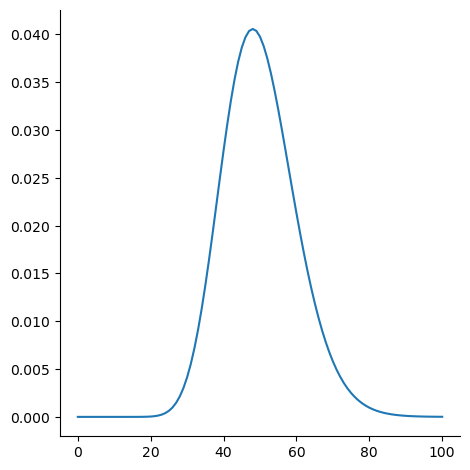

In [27]:
# Plotting chi-squared distribution with 50 df
sns.relplot(x=x_ax, y=y_ax, kind='line');

**Stating Hypothesis**

Null hypothesis H0: $\sigma^2$ = $\sigma_0^2$ or $\sigma^2$ = 4 (The population variance is equal to the hypothesized value of 4, indicating no change)

Alternative hypothesis H1: $\sigma^2$ $\neq$ $\sigma_0^2$ or $\sigma^2$ $\neq$ 4 (The population variance is different from the hypothesized value of 4, suggesting a change has occurred)

Here, $\sigma^2$ refers to the true but unknown population variance we are testing.

**Selecting the Level of Significance or α Level or the Probability of Error**

Given that the confidence level (1 - α) is 90%, the significance level (α) is 10% (or 0.10). Therefore, for a two-tailed test, the significance level for each tail is α/2 = 0.05.

**Calculating $\chi^2$ Test Statistic**

In [28]:
chi_sq_cal = (51-1) * (2.35**2) / (2**2) # Here, chi-square test statistic is calculated by using python just like a calculator

In [29]:
chi_sq_cal

69.03125000000001

**Calculating $\chi^2$ Critical Value**

Since the given $\chi^2$ distribution involves a two-tailed test, there are two critical values. Unlike the normal distribution, the chi-squared distribution is not symmetric around zero, so we need to calculate the critical values separately for the right-tailed and left-tailed probabilities.

In [30]:
# Calculating the Chi-squared critical value on the right for which the right-tail probability is 0.05.
chi_sq_crit_right = stats.chi2.isf(q=0.05, df=50) 
# Here, q = α/2 for the right-tailed test

In [31]:
chi_sq_crit_right

67.5048065495412

In [32]:
# Calculating the Chi-squared critical value on the left for which the right-tail probability is 0.95
chi_sq_crit_left = stats.chi2.isf(q=0.95, df=50) 
# Here, q = 1 - α/2, since we use the 95% area to the right of the curve instead of the 5% area on the left.

In [33]:
chi_sq_crit_left

34.76425168350175

**Interpreting Results**

Here, the calculated chi-squared value of 69.03 falls in the rejection region—that is, it lies outside the range between the lower critical value (34.76) and the upper critical value (67.50) of the chi-squared distribution. Therefore, we reject the null hypothesis at the $\alpha$ = 0.10 level and conclude that the sample variance has significantly changed from the population variance.

###  *'Chi-Squared Test' for One-Sample Variance Test (Right-Tailed Test)*

**Question:** When a sample of 51 bottles was selected and measured, the standard deviation was found to be 2.35 cc. The population standard deviation was 2 cc. Has the sample variance increased from the population variance? Conduct a hypothesis test at the 90% confidence level.

**Stating Hypothesis**

Null hypothesis H0: $\sigma^2$ $\leq$ $\sigma_0^2$ or $\sigma^2$ $\leq$ 4 (The population variance is less than or equal to the hypothesized value of 4, suggesting no increase)

Alternative hypothesis H1: $\sigma^2$ $\gt$ $\sigma_0^2$ or $\sigma^2$ $\gt$ 4 (The population variance has increased from 4, indicating an increase)

Here, $\sigma^2$ refers to the true but unknown population variance we are testing.

**Selecting the Level of Significance or α Level or the Probability of Error**

Given that the confidence level (1 - α) is 90%, the level of significance (α) for the one-tailed test is 10% or 0.1. 

**Calculating $\chi^2$ Test Statistic**

In [34]:
chi_sq_cal = (51-1) * (2.35**2) / (2**2) # Here, chi-square test statistic is calculated by using python just like a calculator

In [35]:
chi_sq_cal

69.03125000000001

**Calculating $\chi^2$ Critical Value**

In [36]:
# Calculating the Chi-squared critical value on the right for which the right-tail probability is 0.10.
chi_sq_crit_right = stats.chi2.isf(q=0.10, df=50)

In [37]:
chi_sq_crit_right

63.167121005726315

**Interpreting Results**

Since the calculated chi-squared value of 69.03 is greater than the critical value of 63.16, it falls in the rejection region. Therefore, we reject the null hypothesis and conclude that the sample variance has significantly increased compared to the population variance.